# MountainHub API - Alaska query
2/16/2020

Query for all data in Alaska, under a specific project / activity, since 2019-11-9

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import geopandas as gpd
import folium

import mtnhubsnow as mh

## Basic Usage
Basic usage of the API wrapper is demonstrated below. The following optional parameters may also be specified to fetch within a certain time range or area, and to limit the number of results. Data is returned as a pandas dataframe.

- limit: int (default: 1000)
- start: datetime (default: None),
- end: datetime (default: None),
- box: dict of coordinates (default: None)

In [2]:
mh.snow_data?

In [3]:
# Search Area
region = {
    'latmax' : 75,
    'latmin' : 54,
    'lonmax': -140,
    'lonmin': -170,
}

obs = mh.snow_data(obs_type='snow_conditions,snowpack_test', 
                   limit=10000000, start=datetime(2019,11,9),
                   bbox=region)

In [4]:
len(obs)

73

In [5]:
obs.obs_type.value_counts()

snow_conditions    60
snowpack_test      13
Name: obs_type, dtype: int64

In [6]:
obs.tail(10)

,id,datetime_utc,latitude,longitude,author_name,obs_type,snow_depth,description
91,5dd32dd8991f631a41d1ff35,2019-11-18 15:48:03.886,64.859804,-147.847421,Jessica Landry,snow_conditions,32.999999,
92,5dd32e23991f631a41d1ff52,2019-11-18 15:47:49.847,64.860546,-147.846669,Chris,snowpack_test,43.000000,
93,5dd32d8a24869802b91e7be9,2019-11-18 15:47:12.920,64.859774,-147.847815,Sara Church,snow_conditions,29.999999,
94,5dd32d6524869802b91e7bba,2019-11-18 15:46:38.088,64.860582,-147.846802,Chris,snowpack_test,43.000000,
96,5dd32e0a24869802b91e7c65,2019-11-18 15:46:08.250,64.859848,-147.848071,Nancy Fresco,snow_conditions,24.999999,
97,5dd32d5b991f631a41d1fea6,2019-11-18 15:46:00.320,64.860007,-147.846720,Chris,snowpack_test,43.000000,
98,5dd32deb24869802b91e7c5a,2019-11-18 15:45:37.788,64.859789,-147.848002,Nancy Fresco,snow_conditions,28.999999,
99,5dcb65abc2cf0772269a65a7,2019-11-12 18:08:16.357,62.500289,-150.327500,Mike Miller,snow_conditions,2.540000,SAAW2019.
100,5dc9eccf1382367426ce8ad5,2019-11-11 15:20:15.538,65.046278,-147.416950,Katreen Wikstrom Jones,snow_conditions,75.000000,
101,5dc746b30eec241c400f95f6,2019-11-09 15:07:22.745,61.798464,-149.279611,Katreen Wikstrom Jones,snow_conditions,101.000000,


In [7]:
obs_saaw2019 = obs[obs.description.str.contains("SAAW2019")]

In [8]:
len(obs_saaw2019)

9

In [9]:
obs_saaw2019

,id,datetime_utc,latitude,longitude,author_name,obs_type,snow_depth,description
63,5ddadde6281f54198817401c,2019-11-24 11:45:02.222,61.251822,-149.513328,Emily Baker,snow_conditions,45.00,SAAW2019
65,5dd9d5aa1bbaa50474c07c9b,2019-11-23 16:57:37.458,61.235399,-149.617811,Emily Baker,snow_conditions,0.00,SAAW2019
66,5dd9d5a600793c7c47e89afa,2019-11-23 16:44:14.999,61.233255,-149.579530,Emily Baker,snow_conditions,3.00,"SAAW2019 3 cm total low density new fluff, may..."
67,5dd9d1fc7a711870a3d9bccf,2019-11-23 16:17:25.255,61.246685,-149.534172,Emily Baker,snow_conditions,40.00,SAAW2019
68,5dd9d21a1bbaa50474c07aca,2019-11-23 16:11:59.775,61.248577,-149.528851,Emily Baker,snow_conditions,5.00,SAAW2019
69,5dd9c9d61bbaa50474c07789,2019-11-23 16:07:12.002,61.252118,-149.518262,Emily Baker,snow_conditions,16.00,SAAW2019
70,5dd9c8e81bbaa50474c076e7,2019-11-23 15:57:40.820,61.253634,-149.508786,Emily Baker,snow_conditions,85.00,SAAW2019
71,5dd9c5b500793c7c47e893e6,2019-11-23 15:49:34.526,61.250950,-149.507558,Emily Baker,snow_conditions,12.00,SAAW2019
99,5dcb65abc2cf0772269a65a7,2019-11-12 18:08:16.357,62.500289,-150.327500,Mike Miller,snow_conditions,2.54,SAAW2019.


In [10]:
obs.author_name.value_counts()

Emily Baker                12
Chris                      10
Jessica Landry              8
Katreen Wikstrom Jones      6
Joseph Kurtak               6
Sarah Carter                6
Erin Mckittrick             5
William Olofsson            3
Klay Baker                  3
Julie Carpenter             3
Nancy Fresco                2
Gabriel Wolken              2
Tamra Jones                 1
Sara Church                 1
Brandon Marshall            1
Kaden Fitzgerald Addler     1
Michael Olive               1
Marvin Turner               1
Mike Miller                 1
Name: author_name, dtype: int64

In [11]:
obs[obs.author_name == 'Emily Baker']

,id,datetime_utc,latitude,longitude,author_name,obs_type,snow_depth,description
63,5ddadde6281f54198817401c,2019-11-24 11:45:02.222,61.251822,-149.513328,Emily Baker,snow_conditions,45.0,SAAW2019
65,5dd9d5aa1bbaa50474c07c9b,2019-11-23 16:57:37.458,61.235399,-149.617811,Emily Baker,snow_conditions,0.0,SAAW2019
66,5dd9d5a600793c7c47e89afa,2019-11-23 16:44:14.999,61.233255,-149.579530,Emily Baker,snow_conditions,3.0,"SAAW2019 3 cm total low density new fluff, may..."
67,5dd9d1fc7a711870a3d9bccf,2019-11-23 16:17:25.255,61.246685,-149.534172,Emily Baker,snow_conditions,40.0,SAAW2019
68,5dd9d21a1bbaa50474c07aca,2019-11-23 16:11:59.775,61.248577,-149.528851,Emily Baker,snow_conditions,5.0,SAAW2019
69,5dd9c9d61bbaa50474c07789,2019-11-23 16:07:12.002,61.252118,-149.518262,Emily Baker,snow_conditions,16.0,SAAW2019
70,5dd9c8e81bbaa50474c076e7,2019-11-23 15:57:40.820,61.253634,-149.508786,Emily Baker,snow_conditions,85.0,SAAW2019
71,5dd9c5b500793c7c47e893e6,2019-11-23 15:49:34.526,61.250950,-149.507558,Emily Baker,snow_conditions,12.0,SAAW2019
72,5dd9c4fa1bbaa50474c075bf,2019-11-23 15:46:27.787,61.250972,-149.507611,Emily Baker,snow_conditions,12.0,
73,5dd9c4d27a711870a3d9a7a1,2019-11-23 15:20:42.736,61.253194,-149.507074,Emily Baker,snow_conditions,45.0,


In [12]:
# obs.to_csv('mountainhub_data_alaska_since20191109.csv', index=False)

## Plotting
Results can be easily plotted as demonstrated below, although the desired axis must be specified.

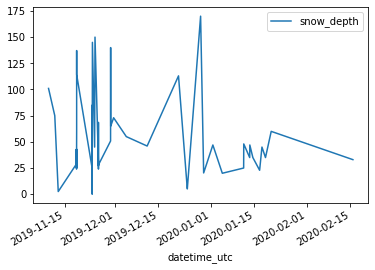

In [13]:
obs.plot(x='datetime_utc', y='snow_depth');

Create a GeoDataframe from the `obs` Dataframe

In [14]:
obs_gdf = gpd.GeoDataFrame(obs, geometry=gpd.points_from_xy(obs['longitude'], obs['latitude']))

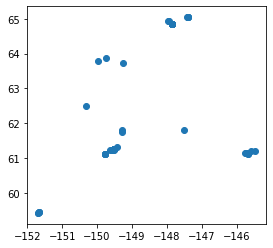

In [15]:
obs_gdf.plot()

In [16]:
m = folium.Map(tiles='Stamen terrain')

In [17]:
for idx, row in obs_gdf.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  icon=folium.Icon(color='blue' if row['obs_type'] == 'snow_conditions' else 'green'),
                  popup="<b>{0}: {1:.1f}</b></br>{2}. Observation type: {3}</b> {4}".format(
                      row['datetime_utc'], row['snow_depth'], 
                      row['author_name'], row['obs_type'], row['description'])
                 ).add_to(m)

# Set the map extent (bounds) to the extent of the sites
m.fit_bounds(m.get_bounds())

m